In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv('spam_ham_dataset.csv', sep=',')
dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
dataset = dataset.drop(dataset.columns[0], axis=1)  # Dropping the first column

In [4]:
dataset

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,ham,Subject: industrial worksheets for august 2000...,0


In [5]:
import gensim
dataset['text_list'] = dataset['text'].apply(lambda x: gensim.utils.simple_preprocess(x))
dataset.head()

,label,text,label_num,text_list
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,"[subject, enron, methanol, meter, this, is, fo..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"[subject, hpl, nom, for, january, see, attache..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"[subject, neon, retreat, ho, ho, ho, we, re, a..."
3,spam,"Subject: photoshop , windows , office . cheap ...",1,"[subject, photoshop, windows, office, cheap, m..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,"[subject, re, indian, springs, this, deal, is,..."


In [6]:
print(dataset.columns)

Index(['label', 'text', 'label_num', 'text_list'], dtype='object')


In [7]:
dataset['text_list'] = dataset['text_list'].apply(lambda x: x[1:] if x[0] == 'subject' else x)
dataset.head()

,label,text,label_num,text_list
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,"[enron, methanol, meter, this, is, follow, up,..."
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"[hpl, nom, for, january, see, attached, file, ..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"[neon, retreat, ho, ho, ho, we, re, around, to..."
3,spam,"Subject: photoshop , windows , office . cheap ...",1,"[photoshop, windows, office, cheap, main, tren..."
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,"[re, indian, springs, this, deal, is, to, book..."


In [8]:
from sklearn.model_selection import train_test_split
dataset['label']=dataset['label'].map({'ham':1,'spam':0})
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(dataset['text_list'],dataset['label'], test_size=0.2)
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)

In [9]:
dataset.head()

,label,text,label_num,text_list
0,1,Subject: enron methanol ; meter # : 988291\r\n...,0,"[enron, methanol, meter, this, is, follow, up,..."
1,1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"[hpl, nom, for, january, see, attached, file, ..."
2,1,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"[neon, retreat, ho, ho, ho, we, re, around, to..."
3,0,"Subject: photoshop , windows , office . cheap ...",1,"[photoshop, windows, office, cheap, main, tren..."
4,1,Subject: re : indian springs\r\nthis deal is t...,0,"[re, indian, springs, this, deal, is, to, book..."


In [10]:
import gensim
w2v_model = gensim.models.Word2Vec(X_train,
                                   vector_size=100,
                                   window=5,
                                   workers=4,
                                   min_count=1)

In [11]:
words = set(w2v_model.wv.index_to_key)
print(words)

{'aorta', 'meliorate', 'reasonable', 'dos', 'charlene', 'tenacious', 'biota', 'entropy', 'tn', 'pmg', 'edema', 'bali', 'extraditable', 'dash', 'ytp', 'sherwood', 'grotesque', 'efficacy', 'retaining', 'toys', 'enlarg', 'goodell', 'criptions', 'tmooney', 'whippanyparley', 'stanford', 'oibr', 'gigahertz', 'xfydjhxtf', 'karyatid', 'sakamkzzwtlsan', 'noagl', 'troops', 'qjfspzm', 'valdez', 'valor', 'nfl', 'bangladesh', 'lelyveld', 'adams', 'caa', 'mvchte', 'compiling', 'foreignxdrugs', 'sailing', 'jumdwu', 'sketch', 'nicholie', 'yourself', 'countless', 'prada', 'ylsxlcuc', 'refractory', 'dialog', 'isotherm', 'folosko', 'lenders', 'shields', 'gpxtcjtotyrdf', 'fundraiser', 'encourage', 'dorcas', 'flammable', 'deming', 'tetc', 'impede', 'jaime', 'erich', 'kbxj', 'charity', 'reneau', 'belo', 'scans', 'choir', 'centerspan', 'opegning', 'operates', 'ptolemy', 'datbase', 'airedale', 'concern', 'unit', 'ww', 'canoga', 'dobbin', 'via', 'easton', 'pickl', 'mezzo', 'district', 'profusion', 'dome', 'sue

In [12]:
print(type(w2v_model.wv['birthplace']))

<class 'numpy.ndarray'>


In [13]:
X_train

0       [http, www, pge, texas, com, www, gtt, nsf, ht...
1       [pictures, had, computer, problems, today, whi...
2       [cornhusker, imbalance, daren, the, cleburne, ...
3       [alis, soft, tabs, fast, shipping, viagra, new...
4       [reliant, energy, entex, transaction, just, fy...
                              ...                        
4131    [re, new, turn, ons, the, deals, are, all, in,...
4132    [hpl, nom, for, april, see, attached, file, hp...
4133    [tetco, hpl, enerfin, meter, step, romeo, plea...
4134    [your, amazon, com, order, hello, from, amazon...
4135    [here, can, buy, soft, ware, at, che, ap, jess...
Name: text_list, Length: 4136, dtype: object

In [14]:
X_train_vect = [
    np.array([w2v_model.wv[i] for i in ls if i in words]) if any(i in words for i in ls) else np.zeros((1, 100))
    for ls in X_train
]
X_test_vect = [
    np.array([w2v_model.wv[i] for i in ls if i in words]) if any(i in words for i in ls) else np.zeros((1, 100))
    for ls in X_test
]

In [15]:
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

In [16]:
for i, v in enumerate(X_train_vect_avg):
    print(len(X_train.iloc[i]), len(v))

11 100
76 100
45 100
35 100
29 100
61 100
10 100
27 100
42 100
29 100
146 100
0 100
34 100
96 100
38 100
11 100
138 100
40 100
34 100
10 100
25 100
172 100
588 100
11 100
8 100
138 100
102 100
180 100
271 100
189 100
61 100
238 100
107 100
35 100
247 100
218 100
58 100
122 100
50 100
62 100
611 100
137 100
383 100
737 100
49 100
7 100
63 100
15 100
125 100
28 100
166 100
78 100
120 100
257 100
56 100
305 100
62 100
172 100
43 100
90 100
296 100
162 100
402 100
11 100
98 100
9 100
69 100
33 100
122 100
526 100
434 100
123 100
23 100
45 100
49 100
11 100
298 100
24 100
80 100
54 100
76 100
37 100
615 100
28 100
284 100
57 100
502 100
11 100
57 100
5 100
11 100
33 100
8 100
187 100
68 100
120 100
11 100
71 100
56 100
39 100
147 100
1151 100
32 100
47 100
347 100
299 100
54 100
27 100
103 100
70 100
340 100
230 100
45 100
92 100
24 100
39 100
328 100
64 100
81 100
162 100
10 100
111 100
303 100
42 100
66 100
62 100
44 100
12 100
16 100
278 100
25 100
234 100
28 100
151 100
108 100
128 100


In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_model = rf.fit(X_train_vect_avg, y_train.values.ravel())

In [18]:
y_pred = rf_model.predict(X_test_vect_avg)

In [19]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print('Precision: {} / Recall: {} / Accuracy: {}'.format(
    round(precision, 3), round(recall, 3), round((y_pred==y_test).sum()/len(y_pred), 3)))

Precision: 0.969 / Recall: 0.979 / Accuracy: 0.964


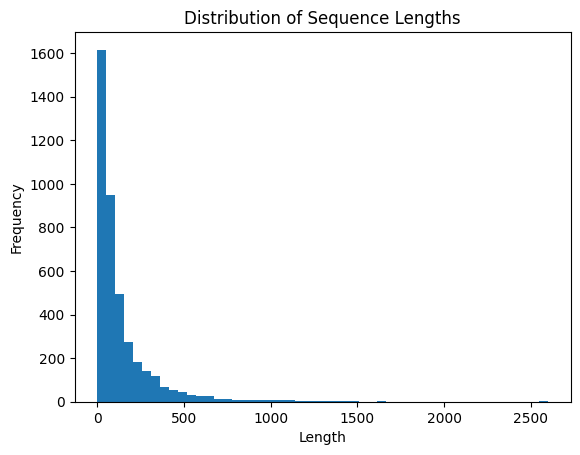

Max length: 2598
Mean length: 139.6605415860735
Median length: 71.0


In [22]:

sequence_lengths = [len(seq) for seq in X_train]
import matplotlib.pyplot as plt

plt.hist(sequence_lengths, bins=50)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

print(f"Max length: {max(sequence_lengths)}")
print(f"Mean length: {np.mean(sequence_lengths)}")
print(f"Median length: {np.median(sequence_lengths)}")

In [28]:
from sklearn.preprocessing import LabelEncoder

def vectorize_text(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)

# Create feature vectors
dataset['vectors'] = dataset['text_list'].apply(vectorize_text)
X = np.array(dataset['vectors'].tolist())

# Encode labels
y = LabelEncoder().fit_transform(dataset['label'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Train classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predict
y_pred = classifier.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.978743961352657
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       742
           1       0.96      0.97      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



In [29]:
X_train

array([[ 0.26151952, -0.3051317 ,  0.13906813, ..., -0.68172616,
        -0.23499185, -0.02932498],
       [ 0.13568068,  0.03842307,  0.09048421, ..., -0.35557461,
        -0.27097327, -0.1400083 ],
       [ 0.29281774, -0.16787709, -0.07437434, ..., -0.81092912,
         0.09148652, -0.68369752],
       ...,
       [ 0.12021673,  0.00522205,  0.06332594, ..., -0.53984451,
        -0.18131132,  0.1568352 ],
       [-0.24033757,  0.36130863, -0.10395028, ..., -0.78008562,
        -0.01850092, -0.59116584],
       [ 0.03915145, -0.31807485, -0.02788209, ..., -0.19326539,
        -0.22655411, -1.3350662 ]])

In [34]:
w2v_model.wv.most_similar('mineral')


[('wyoming', 0.9881755709648132),
 ('river', 0.9876812100410461),
 ('bnp', 0.9873396754264832),
 ('feet', 0.9870601296424866),
 ('chapman', 0.985823392868042),
 ('surge', 0.9847327470779419),
 ('copper', 0.9842222929000854),
 ('arm', 0.9838252663612366),
 ('mcmahon', 0.9837139844894409),
 ('prime', 0.9833564758300781)]

In [21]:
from platform import python_version

print(python_version())


3.10.13
